<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')

import pandas as pd
df = pd.read_csv('/content/MyGoogleDrive/My Drive/Python-for-Titanic/Ch06/Iris.csv')
df.head()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.duplicated().sum()

3

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df = df.drop_duplicates()
df.reset_index(drop=True)

s = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
df_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df_y = df['Species']

In [26]:
df_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2)

In [29]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
115,6.4,3.2,5.3,2.3
128,6.4,2.8,5.6,2.1
143,6.8,3.2,5.9,2.3
64,5.6,2.9,3.6,1.3
108,6.7,2.5,5.8,1.8


In [30]:
y_train.head()

115    2
128    2
143    2
64     1
108    2
Name: Species, dtype: int64

In [31]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
42,4.4,3.2,1.3,0.2
137,6.4,3.1,5.5,1.8
40,5.0,3.5,1.3,0.3
99,5.7,2.8,4.1,1.3


In [32]:
y_test.head()

8      0
42     0
137    2
40     0
99     1
Name: Species, dtype: int64

In [33]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
score = knn.score(X_test, y_test)
print('KNN訓練後計算準確率')
print('準確率 ', score)

KNN訓練後計算準確率
準確率  0.9666666666666667


k =  1  準確率 =  0.9666666666666667
k =  2  準確率 =  0.9666666666666667
k =  3  準確率 =  0.9666666666666667
k =  4  準確率 =  0.9666666666666667
k =  5  準確率 =  0.9666666666666667
k =  6  準確率 =  0.9666666666666667
k =  7  準確率 =  0.9666666666666667
k =  8  準確率 =  1.0
k =  9  準確率 =  1.0
k =  10  準確率 =  1.0


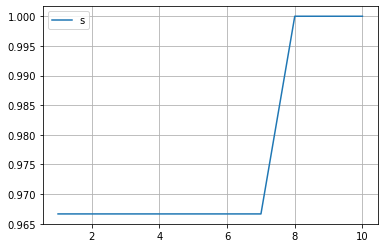

In [35]:
s = []
for i in range(1, 11):
  k = i
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print('k = ', k, ' 準確率 = ', score)
  s.append(score)

df_knn = pd.DataFrame()
df_knn['s'] = s
df_knn.index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_knn.plot(grid=True)

In [36]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [38]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)

accuracy_score(y_test, pred)

1.0

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]])

In [40]:
from sklearn.model_selection import cross_val_score

s = cross_val_score(knn, df_X, df_y, scoring='accuracy', cv=10)
print('cross validatoin accuracy: ', s)
print('mean of cross validatoin accuracy: ', s.mean())

cross validatoin accuracy:  [1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.92857143 1.         1.        ]
mean of cross validatoin accuracy:  0.9661904761904762


In [42]:
new = [[6.6, 3.1, 5.2, 2.4]]
v = knn.predict(new)
if v == 0:
  s = 'Iris-Setosa'
elif v == 1:
  s = 'Iris-Versicolour'
elif v == 2:
  s = 'Iris-Virginica'
else:
  s = '錯誤'
print('預測結果為', s)

預測結果為 Iris-Virginica
